In [1]:
import numpy as np
import random
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

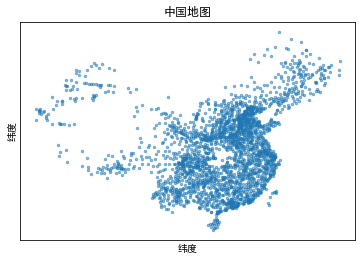

,省级,县级,经度,纬度
0,广东省,广州,113.26436,23.12908
1,广东省,越秀,113.26680,23.12901
2,广东省,荔湾,113.24428,23.12586
3,广东省,海珠,113.31720,23.08331
4,广东省,天河,113.36199,23.12463
...,...,...,...,...
2357,黑龙江省,杜尔伯特,124.44000,46.86000
2358,黑龙江省,加格达奇,124.07000,50.42000
2359,黑龙江省,呼玛,126.60000,51.72000
2360,黑龙江省,塔河,124.70000,52.32000


In [2]:
def china_map_display(df):
    df['经度'] = pd.to_numeric(df['经度'])
    df['纬度'] = pd.to_numeric(df['纬度'])
    colors=np.random.rand(df.shape[0]) 
    plt.scatter(df['经度'], df['纬度'], s=6, alpha=.5)
    plt.xticks([]), plt.yticks([]),plt.title("中国地图")
    plt.xlabel('纬度'),plt.ylabel('纬度')
    plt.show()

df = pd.read_csv("../data/city.txt", names=['省级', '县级', '经度', '纬度'])
china_map_display(df)
df


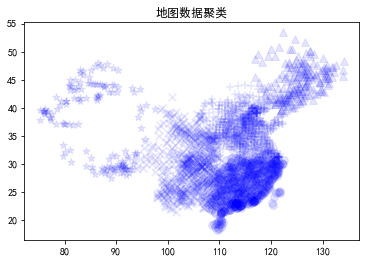

In [8]:
X = df.iloc[:,2:].values ## 经纬度
y = df.iloc[:,:2].values ## 省市名称
n_cluster = 5
cls = KMeans(n_clusters=n_cluster).fit(X) ## 创建模型并训练
cls.labels_ ## 聚类标签

markers = ["^", 'x', 'o', '*', '+']
for i in range(n_cluster): 
    members = cls.labels_ == i 
    plt.scatter(X[members,0] , X[members, 1], s=60, marker = markers[i], c ='b', alpha=0.1)

plt.title("地图数据聚类")
plt.show()

## sklearn

In [4]:
from sklearn.model_selection import train_test_split
from IPython.display import Image
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
import seaborn as sns
import pandas as pd

### 加载数据集
iris = pd.read_csv('../data/iris.csv')
iris.rename(columns={"sepal.length": "sepal_length",
                     "sepal.width": "sepal_width",
                     "petal.length": "petal_length",
                     "petal.width": "petal_width"}, 
            inplace=True)


X = iris.iloc[:, [2, 3]].values ## 第3/4列数据
# X = iris.iloc[:, [2]].values ## 第3/4列数据
y = iris['target'] = iris['variety'].astype('category').cat.codes
## 编码字典
target2label = dict(zip(iris['variety'].values, iris['target'].values))

iris


FileNotFoundError: [Errno 2] No such file or directory: '../data/iris.csv'

In [ ]:
#### 显示数据分布
iris.describe()

In [ ]:
### 绘图

mean_pl = np.mean(iris['petal_length'].values, axis=0)
median_pl = np.median(iris['petal_length'].values, axis=0)
std_pl = np.std(iris['petal_length'].values, axis=0)

fig,axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 5))
sns.stripplot(x="target", y="petal_length",jitter=True, data=iris, ax=axes[0]), axes[0].set_title('花瓣长度与种类')
sns.stripplot(y="petal_length", data=iris, ax=axes[1], linewidth=0.01), axes[1].set_title('花瓣长度散点图')

axes[2].plot(np.arange(len(iris['petal_length'].tolist())), iris['petal_length'].tolist(), '.'),axes[2].set_title('花瓣长度与分布')
axes[2].hlines(y=mean_pl, xmin=0, xmax=len(iris['petal_length'].tolist()), color='r', linestyles='solid')
axes[2].hlines(y=median_pl, xmin=0, xmax=len(iris['petal_length'].tolist()), color='black', linestyles='solid')
axes[2].hlines(y=mean_pl + std_pl, xmin=0, xmax=len(iris['petal_length'].tolist()), color='r', linestyles='dashed')
axes[2].hlines(y=mean_pl - std_pl, xmin=0, xmax=len(iris['petal_length'].tolist()), color='r', linestyles='dashed')

sns.swarmplot(y=iris.petal_length, ax=axes[3], alpha=0.5, color='r'), axes[3].set_title('花瓣长度与分布情况')
sns.boxplot(y="petal_length", data=iris, ax=axes[3], color='yellow', notch = True)


print(mean_pl, median_pl, std_pl)

NameError: name 'iris' is not defined

### 花瓣长度(petal-length)在不同组间差异较大

##### 和sepal_width、sepal_length相比，petal_length、petal_width在不同组间variety 差异较大，即在不同组间有较好的区分度

In [ ]:

# iris['variety'] = iris['variety'].astype('category')
pd.pivot_table(iris,  columns=['variety'], aggfunc='mean')


In [ ]:
def get_std(column, variety, method=1):
    data = iris[iris["variety"]==variety][column].values
    v = np.std(data) if method == 1 else np.mean(data)
    
    return v

names = ["Setosa", "Versicolor", "Virginica"]
factors = ["petal_length", 'petal_width', 'sepal_length', 'sepal_width']

from collections import defaultdict

std = defaultdict(list)
for variety in names:
    for column in factors:
        v = get_std(column, variety)
        std[variety].append(v)

mean = defaultdict(list)
for variety in names:
    for column in factors:
        v = get_std(column, variety, method=2)
        mean[variety].append(v)

std=pd.DataFrame(std, index=factors)
mean=pd.DataFrame(mean, index=factors)
mean

In [ ]:
std

#### mean、std 也正好说明：petal_length、petal_width区分布较好。

## 数据可视化

#### https://seaborn.pydata.org/

In [ ]:
mean.plot(kind='bar',stacked=True)

In [ ]:
fig,ax = plt.subplots(ncols=2, nrows=1, figsize=(8,6))
mean.plot(kind="bar", ax=ax[0])
std.plot(kind="bar", ax=ax[1])

In [ ]:
print(np.mean(iris['petal_length'].values), np.std(iris['petal_length'].values))
print(np.mean(iris['petal_width'].values), np.std(iris['petal_width'].values))
print(np.mean(iris['sepal_length'].values), np.std(iris['sepal_length'].values))
print(np.mean(iris['sepal_width'].values), np.std(iris['sepal_width'].values))

### 花瓣长度(petal-length)分布

In [ ]:
factor = 'petal_length'
sns.stripplot(x="variety", y=factor,jitter=True, data=iris, hue='variety')
sns.violinplot(x="variety", y =factor, data=iris, color='w', inner=None)
plt.grid(True)

#### 花瓣宽度(petal-width)分布

In [ ]:
factor = "petal_width"
sns.stripplot(x="variety", y=factor, jitter=True, data=iris, hue='variety')
sns.violinplot(x="variety", y=factor, data=iris, color='w', inner=None)
plt.grid(True)

#### 萼片宽度(sepal-width)分布

In [ ]:
factor = "sepal_length"
sns.stripplot(x="variety", y=factor, jitter=True, data=iris, hue='variety')
sns.violinplot(x="variety", y=factor, data=iris, color='w', inner=None)
plt.grid(True)

#### 萼片宽度（sepal-width）分布

In [ ]:
factor = "sepal_width"
sns.stripplot(x="variety", y=factor, jitter=True, data=iris, hue='variety')
sns.violinplot(x="variety", y=factor, data=iris, color='w', inner=None)
plt.grid(True)

#### Stripplot
Stripplot的本质就是把数据集中具有quantitative属性的变量按照类别去做散点图(Scatterplot)。

##### 上边左侧的图片便是在默认风格下用stripplot绘制的散点图。在很多情况下，stripplot中的点会重叠，使得我们不容易看出点的分布情况。一个简单的解决办法就是用在stripplot的基础上绘制抖动图(jitterplot)，仅沿着类别坐标轴的方向去随机微调整点的位置，显示出分布情况。

In [ ]:
plt.figure(1,figsize=(16,6))

plt.subplot(1,2,1)
sns.stripplot(x='variety',y='petal_length',data=iris) #stripplot
plt.title('Striplot of sepal length of Iris species')

with sns.axes_style("whitegrid"): # 这个是临时设置样式的命令，如果不写，则按默认格式'darkgrid'进行绘制
    plt.subplot(1,2,2)
    plt.title('Striplot of sepal length of Iris species')
    sns.stripplot(x='variety',y='sepal_length',data=iris,jitter=True) # jitterplot

plt.show()

#### Swarmplot
另一个解决stripplot中点重叠的办法就是绘制swarmplot,它的本质就是用通过算法，在类别坐标轴的方向上去‘延展’绘制这些原本重合的点。
我们将纸鸢花数据集中不同种类花的petal length和petal width做swarmplot可视化

In [ ]:
plt.figure(1,figsize=(15,6))

plt.subplot(1,2,1)
sns.swarmplot(x='variety',y='petal_length',data=iris) 

with sns.axes_style("ticks"): # 这次使用了ticks风格
    plt.subplot(1,2,2)
    sns.swarmplot(x='variety',y='petal_width',data=iris)

plt.show()

#### Boxplot
箱形图，主要包含六个数据节点，将一组数据从大到小排列，分别计算出上边缘，上四分位数Q3，中位数，下四分位数Q1，下边缘，还有异常值。
下面将纸鸢花数据集中的四个变量sepal_length, sepal_width, petal_length和petal_width做箱形图可视化。

In [ ]:
var = ['sepal_length','sepal_width','petal_length','petal_width']
context= ['notebook','paper','talk','poster']
axes_style = ['ticks','white','whitegrid', 'dark']

fig = plt.figure(1,figsize=(15,12))
for i in range(4):
    with sns.axes_style(axes_style[i]): # 将除了默认的darkgrid之外的样式都展现一遍
        plt.subplot(2,2,i+1)
        sns.boxplot(x='variety',y=var[i],data=iris)

plt.show()



#### Violinplot
Violinplot相当于结合了箱形图与核密度图，更好地展现出数据的量化形态。展示如下：

### Barplot
Barplot主要是展现在分类中的quantitative变量的平均值情况，并且用了boostrapping算法计算了估计值的置信区间和error bar.用鸢尾花数据集展示如下：

In [ ]:
var = ['sepal_length','sepal_width','petal_length','petal_width']
context= ['notebook','paper','talk','poster']
axes_style = ['ticks','white','whitegrid', 'dark']

plt.figure(1,figsize=(12,12))
for i in range(4):
    with sns.axes_style(axes_style[i]):#设置axes_style
        sns.set_context(context[i]) # 设置context style,默认为notebook,除此之外还有paper,talk,poster
        plt.subplot(2,2,i+1)
        plt.title(str(var[i])+ ' in Iris species')
        sns.violinplot(x='variety',y=var[i],data=iris)

plt.show()


Violinplot用kernel density estimate去更好地描述了quantitative变量的分布。
与此同时，也可以组合swarmplot和boxplot或violinplot去描述quantitative变量。用鸢尾花数据集展示如下：

In [ ]:
var = ['sepal_length','sepal_width','petal_length','petal_width']
context= ['notebook','paper','talk','poster']
axes_style = ['ticks','white','whitegrid', 'dark']

plt.figure(1,figsize=(12,12))
for i in range(4):
    with sns.axes_style(axes_style[i]):#设置axes_style
        sns.set_context(context[i])#设置context
        plt.subplot(2,2,i+1)
        plt.title(str(var[i])+ ' in Iris species')
        sns.swarmplot(x='variety', y=var[i], data=iris, color="w", alpha=.5) 
        sns.violinplot(x='variety', y=var[i], data=iris, inner=None) if i%2 ==0 \
        else sns.boxplot(x='variety', y=var[i], data=iris) # 分别用swarmplot+violinplot 和swarmplot + boxplot

plt.show()

In [ ]:
plt.figure(1,figsize=(12,12))
for i in range(4):
    with sns.axes_style(axes_style[i]):#设置axes_style
        sns.set_context(context[i]) # 设置context style,默认为notebook,除此之外还有paper,talk,poster
        plt.subplot(2,2,i+1)
        plt.title(str(var[i])+ ' in Iris species')
        sns.barplot(x='variety',y=var[i],data=iris)
plt.show()

#### Countplot
如果想知道在每个类别下面有多少个观察值，用countplot就可以，相当于是做一个observation counts，用鸢尾花数据集展示如下：

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(y="variety", data=iris) # 设置y='species',将countplot水平放置
plt.title('Iris species count')
plt.show()

#### Pointplot
Pointplot相当于是对barplot做了一个横向延伸，一方面，用point estimate和confidence level去展示barplot的内容；另一方面，当每一个主类别下面有更细分的sub-category的时候，pointplot可以便于观察不同sub-category在各主类别之间的联系。展示如下：

In [ ]:
var = ['sepal_length','sepal_width','petal_length','petal_width']
context= ['notebook','paper','talk','poster']
axes_style = ['ticks','white','whitegrid', 'dark']

plt.figure(1,figsize=(12,12))
for i in range(4):
    with sns.axes_style(axes_style[i]):#设置axes_style
        sns.set_context(context[i]) # 设置context style,默认为notebook,除此之外还有paper,talk,poster
        plt.subplot(2,2,i+1)
        plt.title(str(var[i])+ ' in Iris species')
        sns.pointplot(x='variety',y=var[i],data=iris)
plt.show()

#### Factorplot
Factorplot可以说是seaborn做category visualization的精髓，前面讲的这些plot都可以说是factorplot的具体展示。我们可以用PariGrid去实现对多个类别的数值特征用同一种plot做可视化。

In [ ]:
sns.set(style="ticks")
g = sns.PairGrid(iris,
            x_vars = ['sepal_length','sepal_width','petal_length','petal_width'],
            y_vars = 'variety',
            aspect=0.75,size=4) # 设置间距和图片大小
g.map(sns.violinplot,palette='pastel')
plt.show()



#### 看相关性

In [ ]:
vars = ['sepal_length','sepal_width','petal_length','petal_width']

# 使用 .plot 做散点图
iris.plot(kind="scatter", x="sepal_length", y="sepal_width")#数据为萼片的长和宽 结果如下



In [ ]:
# 开始使用seaborn了它能同时显示直方图噢
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, size=5)

In [ ]:
### 交互

sns.set(style="darkgrid")
sns.jointplot('petal_length', 'petal_width', data=iris, kind="reg", color="m")


In [ ]:
sns.jointplot(data=iris, x="petal_length", y="petal_width", kind="reg")

In [ ]:
iris

In [ ]:

sns.jointplot(data=iris, x="petal_length", y="petal_width", hue="variety")


In [ ]:
sns.jointplot(data=iris, x="petal_length", y="petal_width", hue="variety", kind="kde")

In [ ]:
sns.jointplot(data=iris, x="petal_length", y="petal_width", kind="hist")

In [ ]:
sns.jointplot(data=iris, x="petal_length", y="petal_width", kind="hex")

In [ ]:
### 自定义
sns.jointplot(
    data=iris, x="petal_length", y="petal_width",
    marker="+", s=100, marginal_kws=dict(bins=25, fill=False),
)

In [ ]:
sns.jointplot(data=iris, x="petal_length", y="petal_width",\
    height=5, ratio=2, marginal_ticks=True)



In [ ]:
sns.jointplot(data=iris, x="petal_length", y="petal_width",\
    height=5, ratio=2, marginal_ticks=True, hue="variety")



In [ ]:
### 联合图
g = sns.jointplot(data=iris, x="petal_length", y="petal_width")
g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)

In [ ]:

palette = sns.color_palette("rocket_r")
sns.relplot(
    data=iris,
    x="petal_length", y="petal_width",
    hue="variety", 
    kind="line", size_order=["T1", "T2"], 
    height=5, aspect=.75, facet_kws=dict(sharex=False),
)


In [ ]:
# 我们还可以用seaborn's FacetGrid 标记不同的种类噢
g = sns.FacetGrid(iris, hue="variety", size=5)
g.map(plt.scatter, "sepal_length", "sepal_width")
g.add_legend()

In [ ]:
g = sns.PairGrid(iris, x_vars = ['sepal_length','sepal_width'], y_vars="variety", size=5)
g.map(plt.scatter)
g.add_legend()

In [ ]:
sns.kdeplot(x='sepal_length',data=iris)

In [ ]:
# 通过这个曲线图可以看出不同特征值时的分布密度
sns.FacetGrid(iris, hue="variety", size=6) \
   .map(sns.kdeplot, "sepal_length") \
   .add_legend()

In [ ]:
# 利用striplot可以锦上添花，加上散点图
# 使振动值jitter=True 使各个散点分开，要不然会是一条直线
# 注意这里将坐标图用ax来保存了哦，这样第二次才会在原来的基础上加点
ax = sns.boxplot(x="variety", y="sepal_length", data=iris)
ax = sns.stripplot(x="variety", y="sepal_length", data=iris, jitter=True, edgecolor="gray")

In [ ]:
#  pairplot显示不同特征之间的关系
sns.pairplot(iris, hue="variety", size=3)

In [ ]:
# 修改参数dige_kind
sns.pairplot(iris, hue="variety", size=3, diag_kind="kde")

In [ ]:
iris.boxplot(by="variety", figsize=(16, 6))

In [ ]:
# 画图的函数在下面，我们会发现相同种类的线总是缠绵在一起，可以和聚类混在一起噢，事实上他们与欧氏距离是有关系的
from pandas.plotting import andrews_curves
andrews_curves(iris, "variety")


In [ ]:
# 轮廓图也是看高维数据的一种方法，将不同的特征放在横坐标，然后将各点的特征值放在纵坐标就可以了
from pandas.plotting import parallel_coordinates
parallel_coordinates(iris, "variety")



In [ ]:
# 这也是一种将高维点表现在二维平面的方法，具体作图方法应该在上面的网址上应该有
from pandas.plotting import radviz
radviz(iris.drop("target", axis=1), "variety")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 
sc = StandardScaler()   #初始化一个对象sc去对数据集作变换, 数据标准化，
sc.fit(X_train)
print(sc.scale_) ## 标准化后每列的标准差
print(sc.mean_) ### 标准化后每列的均值

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
print(X_train_std.shape, X_test_std.shape)

#### 数据分析

<img src="../data/src/flow.png" width="40%">

#### 分类与可视化

In [ ]:
ppn = Perceptron()  #y=w.x+b
ppn.fit(X_train_std, y_train)

y_pred = ppn.predict(X_test_std)  #对测试集做类别预测


print('Misclassified samples: %d' % (y_test != y_pred).sum())
#Output:Misclassified samples: 3
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))  #预测准确度,(len(y_test)-3)/len(y_test):0.9333333333333333

